In [1]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import osmnx as ox

import os
import sys
import pickle
import seaborn as sns
import geopandas as gpd
import re

from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from pathlib import Path

 

In [3]:
sys.path.append(os.path.join("/home/charles/Projects/QcMtlStreets", "Python"))   

In [4]:
from OsmnxElev import *
print(ROOT_DIR)

/home/charles/Projects/QcMtlStreets/


In [5]:
listNeigh=["Saint-Jean-Baptiste", \
                                                "Saint-Roch" , \
                                                "Vieux-Québec/Cap-Blanc/Colline parlementaire",\
                                                "Montcalm",\
                                                "Saint-Sauveur"]


In [6]:
graphQc3Neigh, shpQc3Neigh, dfPointsSubsetQc3Neigh=getInducedSubgraphNeighQc( listNeigh )

File exists => reading graph
There are  0.17462765309849437  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste, Saint-Roch, Vieux-Québec/Cap-Blanc/Colline parlementaire, Montcalm, Saint-Sauveur


In [11]:
listNodeData=[dat for u, dat in graphQc3Neigh.nodes.data()]
dfNodes=pd.DataFrame(listNodeData)

In [14]:
listPoints=[Point(x, y) for x, y in zip(dfNodes.x, dfNodes.y)]
shpNodes= gpd.GeoDataFrame( dfNodes, geometry= listPoints )

In [15]:
shpNodes.head()

Neighbourhood  elevation highway       osmid  ref          x          y  \
0      Montcalm     90.143     NaN  2510487581  NaN -71.227461  46.804345   
1      Montcalm     89.829     NaN  2510487598  NaN -71.227525  46.804400   
2    Saint-Roch      7.618     NaN  4247650351  NaN -71.239756  46.816536   
3    Saint-Roch      7.704     NaN  4185358389  NaN -71.217611  46.816514   
4    Saint-Roch      7.483     NaN  4185358390  NaN -71.217794  46.816812   

                                geometry  
0         POINT (-71.2274608 46.8043454)  
1            POINT (-71.2275248 46.8044)  
2  POINT (-71.23975590000001 46.8165361)  
3         POINT (-71.2176111 46.8165138)  
4         POINT (-71.2177942 46.8168119)

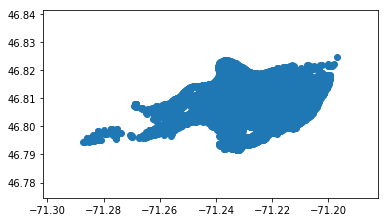

In [16]:
shpNodes.plot()

In [20]:
shpNodes.to_file(os.path.join(ROOT_DIR,"Data","GeoData","GraphShp","centralNeighGraph.shp"))